In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 데이터 불러오기

In [82]:
df = pd.read_csv('data/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1000,37.8000,69.2000,22.1000
1,44.5000,39.3000,45.1000,10.4000
2,17.2000,45.9000,69.3000,12.0000
3,151.5000,41.3000,58.5000,16.5000
4,180.8000,10.8000,58.4000,17.9000


# 다중회귀

## 변수 선택
* 3가지 독립변수 모두 선택

In [83]:
# -----------------------------------
# 독립변수, 종속변수 선택
# -----------------------------------
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

## 훈련세트 테스트세트 분할

In [84]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할
# ------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


## 스케일링
- 선형회귀 모델은 변수의 스케일에 영향을 받음.
- 트리 모델은 스케일링의 영향을 거의 받지 않음.

In [85]:
# ------------------------------------------
# 독립변수 스케일링
# ------------------------------------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_scaled = scaler.fit_transform(X_train)  # 훈련데이터는 fit_transform()
test_scaled = scaler.transform(X_test)        # 테스트데이터는 transform()

In [86]:
# ------------------------------------------
# 독립변수 데이터프레임 형태로 변환
# ------------------------------------------
X_train_scaled = pd.DataFrame(train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(test_scaled, columns=X_test.columns)

In [87]:
# ------------------------------------------
# 스케일링 결과 확인
# ------------------------------------------
X_train_scaled.describe()

,TV,Radio,Newspaper
count,150.0000,150.0000,150.0000
mean,-0.0000,-0.0000,0.0000
std,1.0034,1.0034,1.0034
min,-1.7952,-1.5816,-1.4596
25%,-0.7853,-0.8934,-0.8619
50%,0.1302,-0.1008,-0.2206
75%,0.7943,0.9375,0.7304
max,1.6912,1.7570,3.4092


## 모델 생성 및 훈련

In [88]:
# ------------------------------------------
# LinearRegression 클래스 import
# ------------------------------------------
from sklearn.linear_model import LinearRegression

# ------------------------------------------
# 모델객체 생성하기
# ------------------------------------------
model = LinearRegression()

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 평가

In [89]:
from sklearn.metrics import mean_squared_error, \
                            mean_absolute_error, \
                            root_mean_squared_error, \
                            r2_score

# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
y_pred = model.predict(X_test_scaled)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('===다중회귀 모델의 평가결과===')
print(f'R2:{r2:.4f}')
print(f'RMSE:{rmse:.4f}')
print(f'MAE:{mae:.4f}')
print(f'MSE:{mse:.4f}')

===다중회귀 모델의 평가결과===
R2:0.9116
RMSE:1.5505
MAE:1.1200
MSE:2.4041


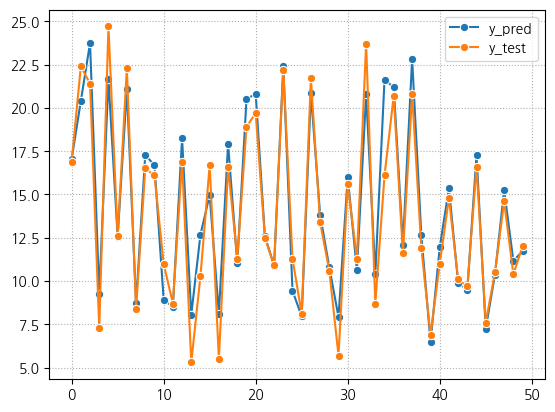

In [90]:
# ------------------------------------
# 실제값과 예측값 시각화 비교
# ------------------------------------
sns.lineplot(y_pred, marker='o', label='y_pred')
sns.lineplot(np.array(y_test), marker='o', label='y_test')
plt.grid(ls=':')
plt.legend()
pass

## 모델의 학습 결과

In [91]:
# ------------------------------------
# 회귀계수와 절편
# ------------------------------------
print(f'회귀계수:{model.coef_}')
print(f'절편:{model.intercept_}')

w1 = model.coef_[0]
w2 = model.coef_[1]
w3 = model.coef_[2]

b = model.intercept_

# ------------------------------------
# 모델이 도출한 규칙
# ------------------------------------
print('=== 모델이 학습한 규칙 ===')
print(f'{w1} * tv + {w2} * radio + {w3} * newspaper + {b}')

회귀계수:[4.63204383 1.48207916 0.0889496 ]
절편:15.570666666666671
=== 모델이 학습한 규칙 ===
4.632043828977966 * tv + 1.4820791574834187 * radio + 0.08894959848537362 * newspaper + 15.570666666666671


<Axes: >

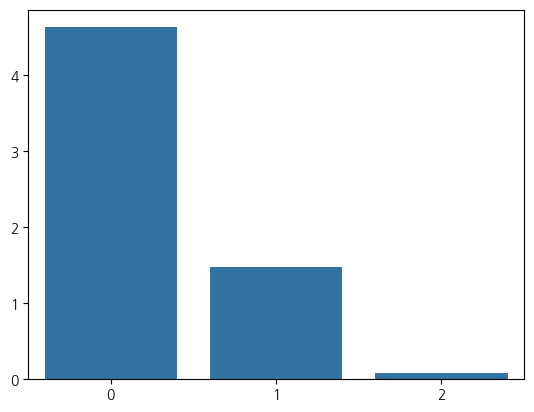

In [92]:
# ------------------------------------
# 회귀계수 시각화
# ------------------------------------
sns.barplot(model.coef_)


## 새로운 값 예측하기
* 스케일링 된 데이터로 훈련했으므로 예측할 데이터도 스케일링을 해주어야 한다.
* 훈련세트에서 사용한 스케일려를 이용하여 스케일링한다.
* 이 때는 fit 하지 않고 transform만 한다.

In [93]:
# ---------------------------
# 새로운 값 입력받기
# ---------------------------
new_tv = int(input('tv 광고비 >>>'))
new_radio = int(input('radio 광고비 >>>'))
new_newspaper = int(input('newspaper 광고비 >>>'))

In [94]:
# ---------------------------
# 새로운 값 스케일링
# ---------------------------
new_data = [[new_tv,new_radio,new_newspaper]]
new_data = pd.DataFrame(new_data, columns=X_test.columns)

new_data_scaled = scaler.transform(new_data)
new_data_scaled = pd.DataFrame(new_data_scaled, columns=X_test.columns)

In [95]:
# ---------------------------
# 새로운 값으로 예측
# ---------------------------
model.predict(new_data_scaled)

array([12.32756347])